In [1]:
%run "cnn_classification.ipynb"

Number of images: 11788
Number of training images by default: 5994
Number of testing images by default: 5794
Number of classes: 200

Final number of images: 11788
Final number of training images: 5994
Final number of testing images: 5794



In [2]:
model = models.efficientnet_b1(weights="DEFAULT")

In [3]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [4]:
# freeze all layers for fine tuning (not doing this takes it very long to train)
for param in model.parameters():
    param.requires_grad = False

# number of inputs in last layer
num_ftrs = model.classifier[1].in_features

model.classifier[1] = nn.Linear(num_ftrs, num_out_ftrs)

# printing the last layer : classifier
print(model.classifier)

model = model.to(device)

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=200, bias=True)
)


In [5]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 256200


(6769384, 256200)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 4.71 Acc: 10.39% Time_Taken: 1m 6s
test Loss: 3.87 Acc: 26.53% Time_Taken: 0m 52s

Epoch 2/10- - - - - - - - - - 
train Loss: 3.63 Acc: 29.56% Time_Taken: 1m 6s
test Loss: 3.25 Acc: 32.41% Time_Taken: 0m 52s

Epoch 3/10- - - - - - - - - - 
train Loss: 3.04 Acc: 39.47% Time_Taken: 1m 6s
test Loss: 2.79 Acc: 39.78% Time_Taken: 0m 51s

Epoch 4/10- - - - - - - - - - 
train Loss: 2.69 Acc: 44.86% Time_Taken: 1m 5s
test Loss: 2.53 Acc: 44.34% Time_Taken: 0m 51s

Epoch 5/10- - - - - - - - - - 
train Loss: 2.46 Acc: 48.43% Time_Taken: 1m 1s
test Loss: 2.36 Acc: 45.41% Time_Taken: 0m 46s

Epoch 6/10- - - - - - - - - - 
train Loss: 2.26 Acc: 51.94% Time_Taken: 1m 0s
test Loss: 2.15 Acc: 48.71% Time_Taken: 0m 47s

Epoch 7/10- - - - - - - - - - 
train Loss: 2.15 Acc: 53.99% Time_Taken: 0m 60s
test Loss: 2.13 Acc: 49.81% Time_Taken: 0m 46s

Epoch 8/10- - - - - - - - - - 
train Loss: 1.99 Acc: 57.16% Time_Taken: 0m 60s
test Loss: 1.

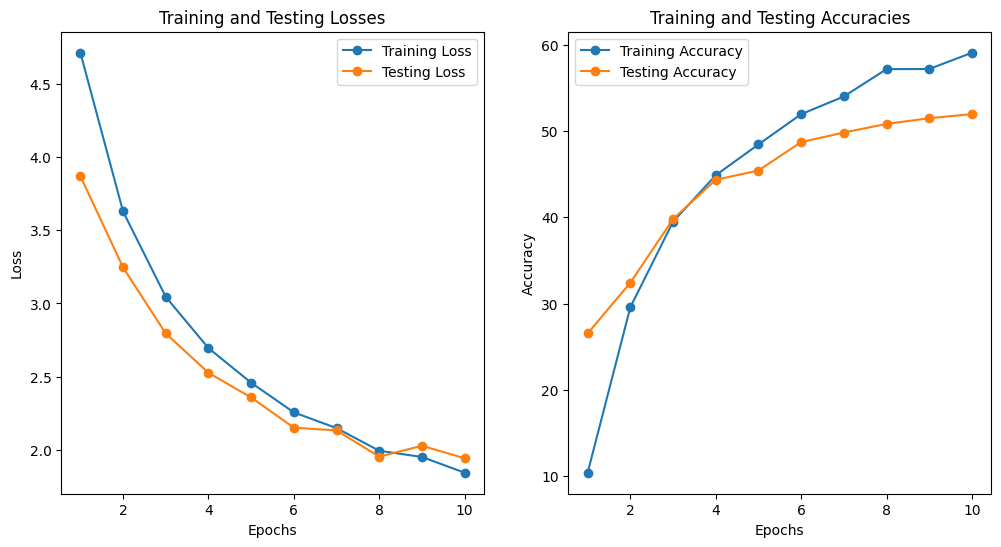

In [6]:
model1, checkpoint1 = train_model(model, num_epoch=10, time_start_from=0)

In [7]:
for param in model.parameters():
    param.requires_grad = True

In [8]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 6769384


(6769384, 6769384)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 2.55 Acc: 39.49% Time_Taken: 2m 6s
test Loss: 2.67 Acc: 38.73% Time_Taken: 0m 46s

Epoch 2/10- - - - - - - - - - 
train Loss: 1.98 Acc: 50.63% Time_Taken: 2m 10s
test Loss: 1.57 Acc: 60.13% Time_Taken: 0m 57s

Epoch 3/10- - - - - - - - - - 
train Loss: 1.71 Acc: 56.47% Time_Taken: 2m 14s
test Loss: 1.72 Acc: 59.03% Time_Taken: 0m 55s

Epoch 4/10- - - - - - - - - - 
train Loss: 1.56 Acc: 60.71% Time_Taken: 2m 6s
test Loss: 1.60 Acc: 61.98% Time_Taken: 0m 47s

Epoch 5/10- - - - - - - - - - 
train Loss: 1.42 Acc: 64.26% Time_Taken: 2m 4s
test Loss: 1.72 Acc: 60.32% Time_Taken: 0m 46s

Epoch 6/10- - - - - - - - - - 
train Loss: 1.32 Acc: 67.40% Time_Taken: 2m 2s
test Loss: 1.68 Acc: 61.79% Time_Taken: 0m 46s

Epoch 7/10- - - - - - - - - - 
train Loss: 1.23 Acc: 68.34% Time_Taken: 2m 3s
test Loss: 1.81 Acc: 61.87% Time_Taken: 0m 46s

Epoch 8/10- - - - - - - - - - 
train Loss: 1.10 Acc: 72.39% Time_Taken: 2m 3s
test Loss: 1.

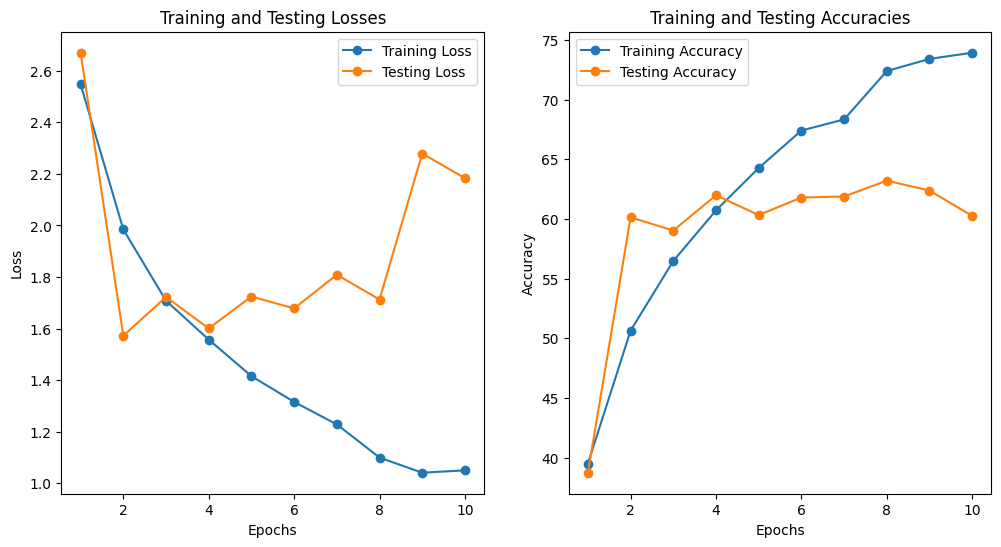

In [9]:
model2, checkpoint2 = train_model(model, num_epoch=10, time_start_from=checkpoint1["time_taken"])

In [10]:
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True

In [11]:
print_model_params(model)

Total number of parameters in model: 6769384
Total number of training parameters in model: 256200


(6769384, 256200)

Training Started on cuda
Epoch 1/10- - - - - - - - - - 
train Loss: 0.89 Acc: 77.86% Time_Taken: 0m 59s
test Loss: 1.47 Acc: 67.54% Time_Taken: 0m 45s

Epoch 2/10- - - - - - - - - - 
train Loss: 0.81 Acc: 80.30% Time_Taken: 0m 60s
test Loss: 1.43 Acc: 68.35% Time_Taken: 0m 45s

Epoch 3/10- - - - - - - - - - 
train Loss: 0.77 Acc: 81.68% Time_Taken: 0m 59s
test Loss: 1.46 Acc: 67.66% Time_Taken: 0m 46s

Epoch 4/10- - - - - - - - - - 
train Loss: 0.72 Acc: 83.15% Time_Taken: 0m 59s
test Loss: 1.49 Acc: 68.55% Time_Taken: 0m 45s

Epoch 5/10- - - - - - - - - - 
train Loss: 0.68 Acc: 83.70% Time_Taken: 0m 59s
test Loss: 1.47 Acc: 68.69% Time_Taken: 0m 45s

Epoch 6/10- - - - - - - - - - 
train Loss: 0.64 Acc: 85.24% Time_Taken: 0m 59s
test Loss: 1.48 Acc: 68.43% Time_Taken: 0m 45s

Epoch 7/10- - - - - - - - - - 
train Loss: 0.63 Acc: 84.48% Time_Taken: 0m 59s
test Loss: 1.48 Acc: 68.40% Time_Taken: 0m 45s

Epoch 8/10- - - - - - - - - - 
train Loss: 0.64 Acc: 85.40% Time_Taken: 0m 59s
test Lo

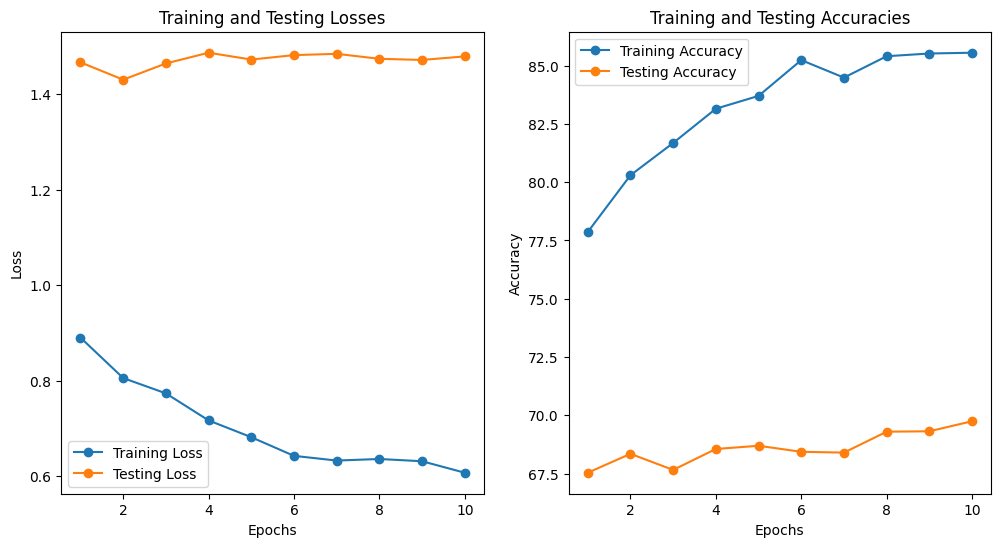

In [12]:
model3, checkpoint3 = train_model(model, num_epoch=10, time_start_from=checkpoint2["time_taken"])

In [16]:
checkpoint3["checkpoint1_loss"] = checkpoint1["epoch_losses"]
checkpoint3["checkpoint2_loss"] = checkpoint2["epoch_losses"]
checkpoint3["checkpoint1_acc"] = checkpoint1["epoch_accuracies"]
checkpoint3["checkpoint2_acc"] = checkpoint2["epoch_accuracies"]

In [17]:
save_model(checkpoint3, file_name = model.__class__.__name__ + "_best_acc_" + str(f"{checkpoint3["best_acc"]:.4f}") + "_optim_" + "Adam" + "_criterion_" + "CrossEntropyLoss" + ".pth")